### Byte Essentials

Formal transformation:
A character ==(Unicode)==> a code point ==encoding==> actual bytes.
<br>
<br>
However, in practice, it seems to be: A character ==encoding==> actual bytes.

In [1]:
s = 'tùng'
s.encode('utf8')

b't\xc3\xb9ng'

Bytes type is immutable.
<br>
Bytearray type is mutable (as array is mutable).
<br>
For both these 2 types: a slice returns a sequances.
<br>
This is different from strings where s[0] = s[:1].

In a binary sequence, the ASCII characters are often kept unchanged (at least for utf8).

In [2]:
bytes('tùng', encoding='utf8')

b't\xc3\xb9ng'

Most methods of str can also be applied on binary sequences.
<br>
(e.g. .endswith(), .replace(), etc.)

### Memory views

Memoryview is somehow like a reference. It does not require copying memory space.
<br>
Yet, memoryview can also be applied other functions to extract more information.
<br>
A change made on the subsequent representation also affect the original data.

In [4]:
import array
numbers = array.array('h', [-2, -1, 0, 1, 2])
memv = memoryview(numbers)
print('memv.tolist():', memv.tolist())
[-2, -1, 0, 1, 2]
memv_oct = memv.cast('B') # change to unsigned char
memv_oct.tolist()
print('memv_oct.tolist():', [254, 255, 255, 255, 0, 0, 1, 0, 2, 0])
print('memv_oct[5]:', memv_oct[5])
memv_oct[5] = 4
print('numbers:', numbers)

memv.tolist(): [-2, -1, 0, 1, 2]
memv_oct.tolist(): [254, 255, 255, 255, 0, 0, 1, 0, 2, 0]
memv_oct[5]: 0
numbers: array('h', [-2, -1, 1024, 1, 2])


mmap may reduce the bytes copied even more.

### Encode/Decode Problems

When encoding a text whose some characters are not defined in the target encoding, UnicodeEncodeError will be raised.
<br> <br>
We can address this problem by passing an error handling mechanism: ‘ignore’, ‘replace’, ‘xmlcharrefreplace’

In [8]:
tung = 'Tùng'
tung.encode('ascii')

UnicodeEncodeError: 'ascii' codec can't encode character '\xf9' in position 1: ordinal not in range(128)

In [7]:
tung.encode('ascii', errors='replace')

b'T?ng'

Decoding also returns similar error.

In [9]:
b = b't\xc3\xb9ng'
b.decode('ascii')

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

In [10]:
b.decode('ascii', errors='replace')

't��ng'

As of now, Python code can contain all Unicode characters by default.

In [11]:
tùng = 'abc'
tùng

'abc'

### How to Discover the Encoding of a Byte Sequence

Some heuristics may be used: if a byte appears many times, it is likely that this byte corresponds to the space character. Thus, from all the encodings available, search for the one whose space is represented by that byte.
<br><br>
A library: chardet

Little-endian: least significant bytes come first.
    <br>
Big -endian: most significant bytes come first.

### Handle text files

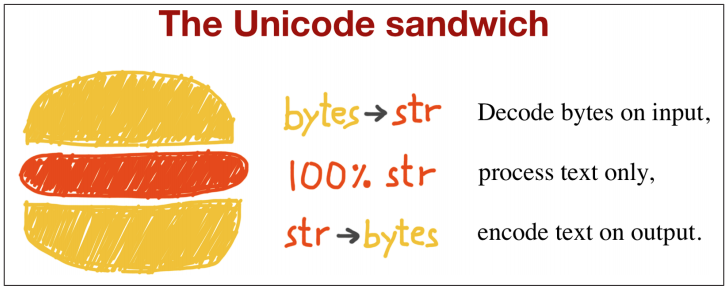

We should always specify the encoding of text files when reading and writing.

We should never open text files in binary mode unless we need to analyze the file contents to detect the encoding.

In Linux and OSX, all default encoding is set to be UTF-8.
<br>
In Windows, multiple encodings are default for different functions. Thus, we need to specify the encoding whenever possible.

In [ ]:
# On Windows
import locale
locale.getpreferredencoding()
# returns 'cp1252'